## Статический взгляд на линейные модели

![static](img/static.png)

Термин регрессия появилас еще в конце XIX века в работе Френсиса Гамильтона.
В этой работе «Регрессия к середине в наследственности роста» Френсис Гальтон исследовал зависимость между средним ростом детей и средним ростом их родителей и обнаружил, что отклонение роста детей от среднего составляет примерно 2/3 отклонения роста родителей от среднего. Казалось бы, со временем люди должны рождаться все ближе и ближе к среднему росту. На самом деле, естественно, этого не происходит.

![static](img/galton_board.jpg)

Лучше понять эффект регрессии к среднему позволяет другое творение
Френсиса Гальтона, которое называется машина, или доска, Гальтона.
Это механическая машина, в которой сверху в центральной части нахо-
дятся шарики. Когда открывается заслонка, шарики начинают постепенно
сыпаться вниз, ударяясь о штырьки, которые расположены на одинаковом
расстояниидруготдруга.Прикаждомсоударениишарикасоштырькомве-
роятности того, что он упадет налево и направо от штырька, равны. Посте-
пенно шарики начинают собираться в секциях внизу в гауссиану, или плот-
ность нормального распределения

## Регрессия

Чаще всего под регрессией понимат минимизацию среднеквадратичной ошибки: квадратов отклонений от откликов у от их предсказанй а(х)
    
$$ Q(w,x) = \frac{1}{l} \sum\limits_{i=1}^l ( \langle w_i,x_i\rangle- y_i) ^2 \to \min_{w}$$ 


Метод МНК, стал полулярен из за наличия аналитического решения. Это логично ведь в 19 веке, не было возможности использовать гардиентный спуск. 

$$ w_*(x) = \text{argmin}_w Q(w,X) = (X^T X)^{-1} X^T y   $$ 


В XIX веке, когда эта задача впервые возникла, никакого способа ее решения, кроме аналитического, быт могло. Сейчас можно численно минимизировать не только среднеквадратичную ошибку, но и, наприме еднюю абсолютную, то есть сумму модулей отклонений нашей модели от отклика:

$$ Q(a,X)= \frac{1}{l}  \sum\limits_{i=1}^l | a(x_i) - y_i |  $$
$$ a_*(x)= \text{argmin}_a Q(a,X) $$

### Метод максимальног правдоподобия 

Чтобы понять метод максимального правдоподобия, можно рассмотреть еще один исторический пример. Эти данные собраны во время игры в **Dota 2**. К одному игроку в течении года прилетало по какому то количеству репортов в день. 

| Кол-во реальных нарушений | 0   | 1  | 2  | 3 | 4 | 5 | Всего |
|---------------------------|-----|----|----|---|---|---|-------|
| Кол-во репортов           | 109 | 65 | 22 | 3 | 1 | 0 | 200   |

Поскольку данная случайная величина — счетчик, ее необходимо моделировать распределением Пуассона, ункция вероятности которого имеет вид:

$$ P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!} $$

Поскольку выборка состоит из независимых, одинаково распределенных случайных величин, вероятность получения строго определенной выборки равна произведению вероятностей получения каждого из элементов этой выборки:


$$  P(X^n, \lambda) = \prod_{i=a}^{n} \frac{\lambda^{X_i} e^{-\lambda}}{X_i!} = L(X^n, \lambda)  $$ 

Функция L зависит от неизвестного параметра $ \lambda $ и называется правдоподобием выборки. В качестве оценки для $ \lambda $ можно взять такое значение, которое максимизирует функцию правдоподобия:

$$ \dot{\lambda}_\text{ОМП} = \text{argmin} x_{\lambda} L(X^N,\lambda) $$ 

Эта оценка называется оценкой максимального правдоподобия. Несложно показать, что в рассматриваемой задаче оценка максимального правдоподобия для параметра $ \lambda $  совпадает с выборочным средним:

$$ \dot{\lambda}_\text{ОМП} = \dot{X}_n = 0.61 $$ 

## Полиномиальная регрессия 

Мы знаем, что есть обычная линейная регрессия которая предстовляет по сути, прямую. Но есть полиномиальная регрессия. На прошлой лекции, мы узнали что можно использовать полином 1 стпени, для прогнозирования, линейно зависимых моделей. Но, а что если, наши данные не описывают линейную функцию, а описывают пароболическую функцию, как тогда быть?


На помощь придет полиномиальная регрессия. Ее суть заключается в добавлени k-степени, каждому новому члену функции. 

Тоесть: 

$$ y_i =  \sum\limits_{j=1}^p w_i x_i^{j-1} $$ 

Или же в более простом виде: 

$$ a(x) = w_0 + w_1x + w_2x^2 + w_3x^3 ... w_j x^p $$ 

При p=1, полином является прямой, при  p=2 -  параболой, p=3 - кубической параболой.


Построим и посмотрим, так ли это.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection # импортируем линейную модель для обучения и библиотеку для разделения нашей выборки

# генеруем набор данных (случайные точки) 
n_observations = 1000
X = np.linspace(-10, 10, n_observations).reshape(n_observations,1)
y = np.sin(X) + np.random.uniform(-0.3,0.3, n_observations).reshape(n_observations,1)

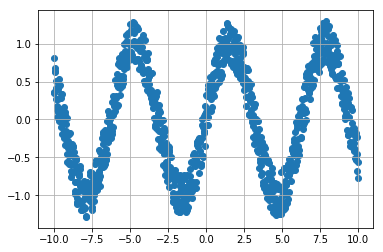

In [2]:
# рисуем набор данных
plt.scatter(X, y, label="data")
plt.grid(True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y) 

Полином 10 степени.        Оценка дисперсии: 0.8784037604105744
Полином 11 степени.        Оценка дисперсии: 0.9331232987982205
Полином 12 степени.        Оценка дисперсии: 0.9331958448947755
Полином 13 степени.        Оценка дисперсии: 0.9391317198388187
Полином 14 степени.        Оценка дисперсии: 0.9391512084140757
Полином 15 степени.        Оценка дисперсии: 0.9388484178471842
Полином 16 степени.        Оценка дисперсии: 0.7146170505699256
Полином 17 степени.        Оценка дисперсии: 0.5548144278444294
Полином 18 степени.        Оценка дисперсии: 0.554778817403902
Полином 19 степени.        Оценка дисперсии: 0.5650294969007659


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


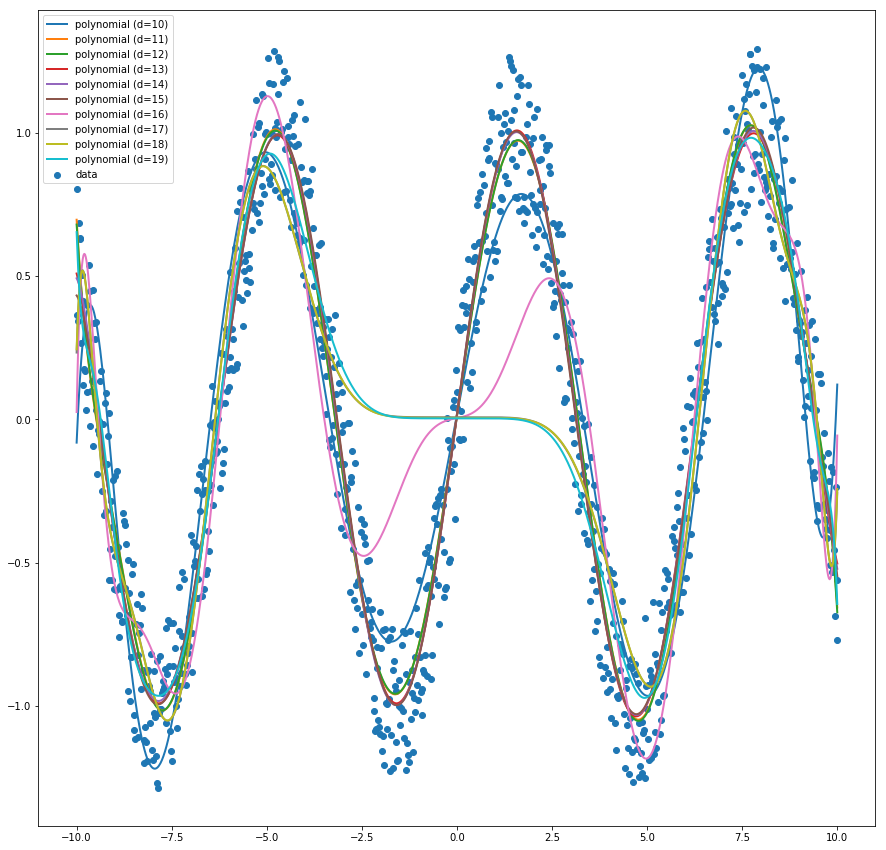

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

fig = plt.figure(figsize=(15,15))
regr = LinearRegression() # регрессия
plt.scatter(X, y, label="data")

# преобразование данных для полиномиальной регрессии
for d in range(10,20): #степень полиномиальной регрессии

    xc =  PolynomialFeatures(degree=d).fit_transform(X)
    regr = regr.fit(xc, y) # строим полиномиальную регрессию
    yr = regr.predict(xc) # результат на тестовом наборе
    plt.plot(X, yr, label='polynomial (d=%i)'%d, lw=2, linestyle='-')
    
    xc =  PolynomialFeatures(degree=d).fit_transform(X_test)
    print('Полином {0} степени.        Оценка дисперсии: {1}'.format(d, regr.score(xc, y_test)))
    
    # рисуем результаты
plt.legend(loc='upper left')

### Регуляризация

Если используется слишком сложная модель, а данных недостаточно, чтобы точно определить ее параметры, эта модель легко может получиться переобученной, то есть хорошо описывать обучающую выборку и плохо — тестовую. Бороться с этим можно различными способами:

- **Взять больше данных.** Такой вариант обычно недоступен, поскольку дополнительные данные стоят дополнительных денег, а также иногда недоступны совсем. Например, в задачах веб-поиска, несмот- ря на наличие терабайтов данных, эффективный объем выборки, описывающей персонализированные данные, существенно ограничен: в этом случае можно использовать только историю посещений данного пользователя.

- **Выбрать более простую модель** или упростить модель, например исключив из рассмотрения неко- торые признаки. Процесс отбора признаков представляет собой нетривиальную задачу. В частности, не понятно, какой из двух похожих признаков следует оставлять, если признаки сильно зашумлены. 

- **Использовать регуляризацию**. Ранее было показано, что у переобученной линейной модели значения весов в модели становятся огромными и разными по знаку. Если ограничить значения весов модели, то с переобучением можно до какой-то степени побороться.

Регуляризация - метод добавления некоторой дополнительной информации к условию с целью решить некорректно поставленную задачу или предотвратить переобучение. 

## $L_1$ - регуляризация и $L_2$ регуляризация 


Есть несколько способов проветси регуляризацию: 
- $L_2$ регуляризатор (ridge-регрессия или гребневая регрессия):
$$ w_* = \text{argmin}_w ( \frac{1}{l} \sum\limits_{i=1}^l ( \langle w_i,x_i\rangle- y_i) ^2 + \lambda \sum\limits_{j=1}^d w_j^2) $$ 
- $L_1$ регуляризатор (lasso-регрессия или лассо-регрессия):

$$ w_* = \text{argmin}_w (\frac{1}{l} \sum\limits_{i=1}^l ( \langle w_i,x_i\rangle- y_i) ^2 + \lambda \sum\limits_{j=1}^d |w_j|) $$ 

Понять различия между $L_1$ и $L_2$ регулязаторами можно на модельном примере. Пусть матрица «объекты– признаки» X является единичной матрицей размера $ l x l$ :

$$ X = \begin{pmatrix}
   1 & 0 & .. & 0 \\
   0 & 0 & .. & 0 \\
   ... & .. & .. & ... \\
   1 & 1 & .. & 1 \\
\end{pmatrix}
$$ 

Тогда при решении задачи линейной регрессии использование метода наименьших квадратов без регуляризации:

$$ w_* = \text{argmin}_w \sum\limits_{i=1}^l ( w_i -  y_i) ^2 $$ 

Дает следующий вектор весов:

$$ w_{*j} = y_j $$

При использовании гребневой регуляризации ($L_2$ –регуляризация) компоненты вектора весов имеют вид:

$$ w_{*j} = \frac{ y_j} {1 + \lambda}  $$

а при использовании $L_2 $–регуляризатора (lasso):

$$ 
w_*j = \begin{cases} y_i - \lambda/2, & y_i>\lambda/2 \\ 
        y_i+\lambda/2, & y_i > -\lambda/2  \\ 0, & |y_i| <= -\lambda/2  \end{cases}
$$ 

При использовании только МНК без регуляризации $w_{∗j} = y_j$ . Соответствующая линия изображена пунк- тиром на обоих графиках. При использовании $L_2$ регуляризации зависимость $w_{∗j}$ от $y_j$ все еще линейная, компоненты вектора весов ближе расположены к нулю.

![Зависимость w∗j от значения отклика yj при использовании различных регуляризаторов.](img/regulization.png)

В случае $L_1$ регуляризации график выглядит несколько иначе: существует область (размера $\lambda$) значений $\lambda$ , для которых $w_j = 0$. То есть lasso, или $L_1$ –регуляризация, позволяет отбирать признаки, а именно: веса признаков, обладающих низкой предсказательной способностью, оказываются равными нулю.

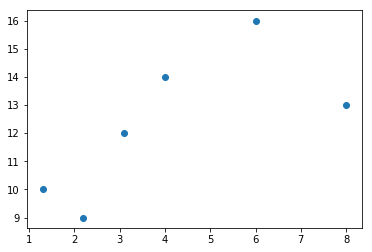

In [4]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.1)
X = [[1.3],[2.2],[3.1],[4],[6],[8]]
y = [10,9,12,14,16,13]
reg.fit(X,y)
plt.scatter(X, y, label="data")

Полином 0 степени.        Оценка дисперсии: 0.0
Полином 1 степени.        Оценка дисперсии: 0.4898593350383629
Полином 2 степени.        Оценка дисперсии: 0.7845681390190021
Полином 3 степени.        Оценка дисперсии: 0.9384139153436029
Полином 4 степени.        Оценка дисперсии: 0.9883562897434799
Полином 5 степени.        Оценка дисперсии: 1.0
Полином 6 степени.        Оценка дисперсии: 1.0
Полином 7 степени.        Оценка дисперсии: 1.0
Полином 8 степени.        Оценка дисперсии: 1.0
Полином 9 степени.        Оценка дисперсии: 1.0
Полином 10 степени.        Оценка дисперсии: 1.0
Полином 11 степени.        Оценка дисперсии: 1.0
Полином 12 степени.        Оценка дисперсии: 1.0
Полином 13 степени.        Оценка дисперсии: 1.0
Полином 14 степени.        Оценка дисперсии: 1.0
Полином 15 степени.        Оценка дисперсии: 1.0
Полином 16 степени.        Оценка дисперсии: 0.9999999999999996
Полином 17 степени.        Оценка дисперсии: 0.9999999999999991
Полином 18 степени.        Оценка дисп

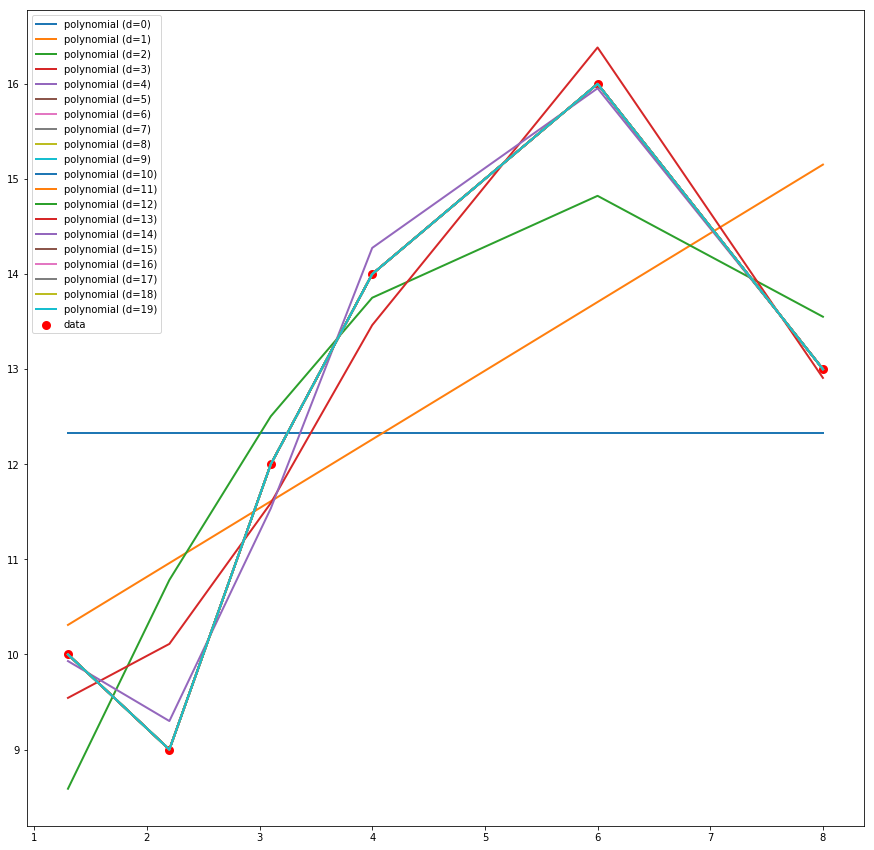

In [5]:
fig = plt.figure(figsize=(15,15))
for d in range(0,20): #степень полиномиальной регрессии
    xc =  PolynomialFeatures(degree=d).fit_transform(X)
    regr = regr.fit(xc, y) # строим полиномиальную регрессию
    yr = regr.predict(xc) # результат на тестовом наборе
    plt.plot(X, yr, label='polynomial (d=%i)'%d, lw=2, linestyle='-')
    xc =  PolynomialFeatures(degree=d).fit_transform(X)    
    print('Полином {0} степени.        Оценка дисперсии: {1}'.format(d, regr.score(xc, y)))
    
    # рисуем результаты

plt.scatter(X, y, label="data", lw=3, color='red')
plt.legend(loc='upper left')

### Посмотрим как ведет себя $L_2$ - регуляризация на большем количестве данных

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection # импортируем линейную модель для обучения и библиотеку для разделения нашей выборки
# генеруем набор данных (случайные точки) 
n_observations = 100
X = np.linspace(-10, 10, n_observations).reshape(n_observations,1)
y = np.sin(X*0.2+2
          ) + np.random.uniform(-0.2,0.2, n_observations).reshape(n_observations,1)

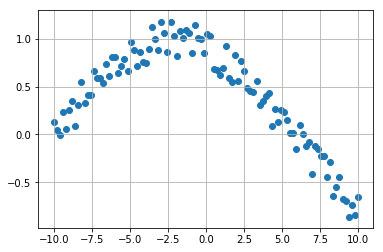

In [7]:
# рисуем набор данных
plt.scatter(X, y, label="data")
plt.grid(True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y) 

Полином 0 степени.        Оценка дисперсии: -0.0006331536492243384
Полином 1 степени.        Оценка дисперсии: 0.37704069963079667
Полином 2 степени.        Оценка дисперсии: 0.920102012264428
Полином 3 степени.        Оценка дисперсии: 0.9272156736004864
Полином 4 степени.        Оценка дисперсии: 0.9305947058302053
Полином 5 степени.        Оценка дисперсии: 0.915811428931207
Полином 6 степени.        Оценка дисперсии: 0.914088818282711
Полином 7 степени.        Оценка дисперсии: 0.9113681817366578
Полином 8 степени.        Оценка дисперсии: 0.9116391497397053
Полином 9 степени.        Оценка дисперсии: 0.9063758697399669
Полином 10 степени.        Оценка дисперсии: 0.9068968458505614
Полином 11 степени.        Оценка дисперсии: 0.9077867681737066
Полином 12 степени.        Оценка дисперсии: 0.9087957145776492
Полином 13 степени.        Оценка дисперсии: 0.9106876081276277
Полином 14 степени.        Оценка дисперсии: 0.9113773006966515
Полином 15 степени.        Оценка дисперсии: 0.9

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


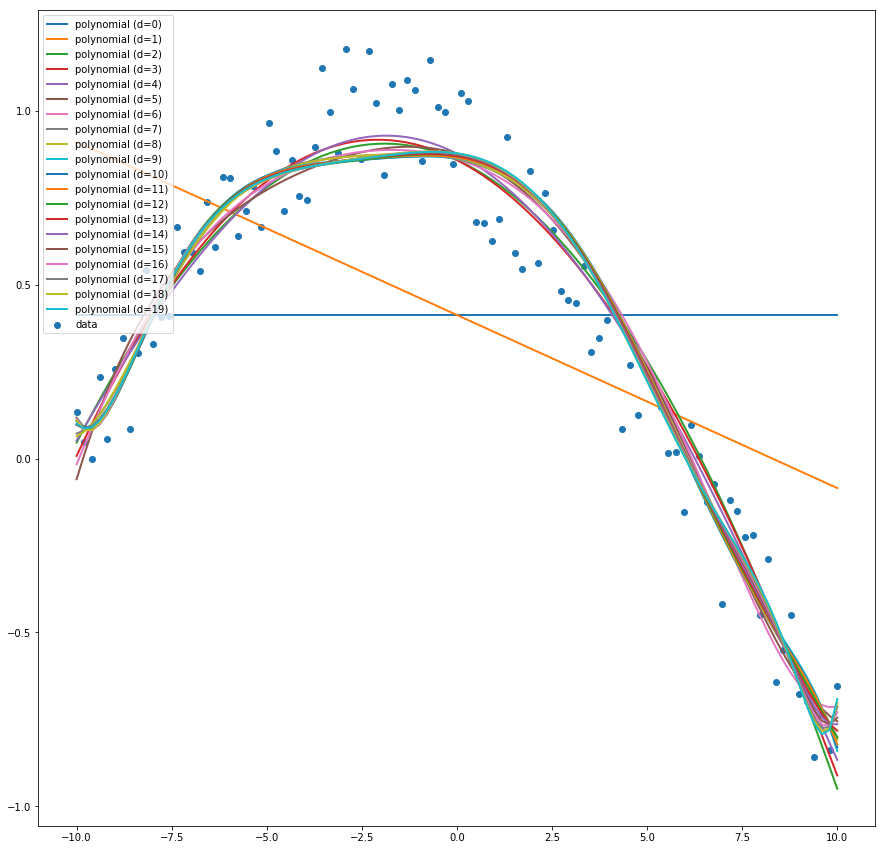

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
fig = plt.figure(figsize=(15,15))
## Для L1 регуляризации вызвать из linear_model модель Ridge
regr = linear_model.Lasso(alpha=0.1) # регрессия
plt.scatter(X, y, label="data")
# преобразование данных для полиномиальной регрессии
for d in range(0,20): #степень полиномиальной регрессии
    xc =  PolynomialFeatures(degree=d).fit_transform(X)
    regr = regr.fit(xc, y) # строим полиномиальную регрессию
    yr = regr.predict(xc) # результат на тестовом наборе
    plt.plot(X, yr, label='polynomial (d=%i)'%d, lw=2, linestyle='-')
    xc =  PolynomialFeatures(degree=d).fit_transform(X_test)    
    print('Полином {0} степени.        Оценка дисперсии: {1}'.format(d, regr.score(xc, y_test)))
    # рисуем результаты
plt.legend(loc='upper left')

Мы увидили, что наилучшее предсказание возникает при степени 3. Давайте посмотрим как предсказывает модель при разных значениях параметра **alpha**

Alpha 0.0. Оценка дисперсии: 0.9401108694149743
Alpha 0.1. Оценка дисперсии: 0.9272156736004864
Alpha 0.2. Оценка дисперсии: 0.9004702365932298
Alpha 0.30000000000000004. Оценка дисперсии: 0.858114450121072
Alpha 0.4. Оценка дисперсии: 0.8007631465472345
Alpha 0.5. Оценка дисперсии: 0.7931885159665152
Alpha 0.6000000000000001. Оценка дисперсии: 0.7924851722666573
Alpha 0.7000000000000001. Оценка дисперсии: 0.7917158801704285
Alpha 0.8. Оценка дисперсии: 0.7908806396778286
Alpha 0.9. Оценка дисперсии: 0.789979450788858


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


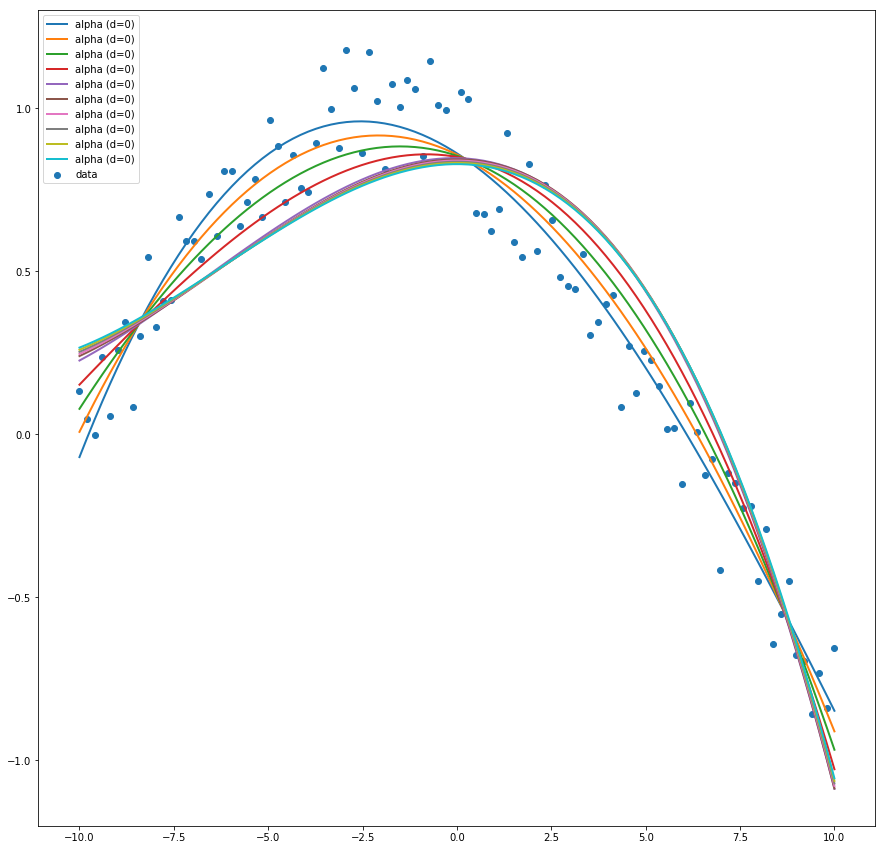

In [9]:
## Для L1 регуляризации вызвать из linear_model модель Ridge
fig = plt.figure(figsize=(15,15))
# преобразование данных для полиномиальной регрессии
for d in np.arange(0.0, 1.0, 0.1): #степень полиномиальной регрессии
    xc =  PolynomialFeatures(degree=3).fit_transform(X)
    regr = linear_model.Lasso(alpha=d) # регрессия
    regr = regr.fit(xc, y) # строим полиномиальную регрессию
    yr = regr.predict(xc) # результат на тестовом наборе
    plt.plot(X, yr, label='alpha (d=%i)'%d, lw=2, linestyle='-')
    xc =  PolynomialFeatures(degree=3).fit_transform(X_test) 
    print('Alpha {0}. Оценка дисперсии: {1}'.format(d, regr.score(xc, y_test)))
    # рисуем результаты
plt.scatter(X, y, label="data")
plt.legend(loc='upper left')

# Смещение и дисперсия

Можно показать, что математическое ожидание квадрата ошибки регрессии представляет собой сумму трех
компонент:

$$  E (a_*(x)-y)^2 = (E \alpha_*(x) - a(x))^2 + Da_*(x) + \sigma^2 $$

От выбора модели зависит квадрат смещения и дисперсия оценки, но не шум, который является свойством данных, а не модели.

Метод наименьших квадратов дает оценки, которые имеют нулевое смещение. Регуляризация позволяет получить смещенные оценки с меньшим  $ E (a_*(x)-y)^2 $. за счет того, что у этой оценки будет меньше дисперсия.

Следующая аналогия позволяет лучше понять баланс между смещением и дисперсией. При стрельбе по мишени среднее число набранных очков зависит от положения средней точки попадания и разбросом относительно этого среднего.

![static](img/dispertion.png)

Лучший результат будет, если стрелять без смещения и без разброса. Переобучению линейных моделей соответствует стрельба без смещения, но с огромным разбросом. И часто оказывается, что можно набрать больше очков, стреляя не совсем в цель, то есть со смещением, но зато более точно. Именно это и позволяет добиться регуляризация.